In [ ]:
import cv2  # OpenCV library -> used for image processing.
import numpy as np  # numpy = a math library
# as np = we will use the short name np instead of writing numpy again and again.
from matplotlib import pyplot as plt  # matplotlib = plotting library
# pyplot = module used to display images and graphs
# as plt = short name plt


# 2. Load Image in Grayscale
image = cv2.imread("/content/OIP.jpeg", 0)  # cv2.imread -> function to read images
# "image.jpg" -> file name of image
# 0 -> load image in grayscale
# image -> variable storing our loaded image


# 3. Apply Fast Fourier Transform (FFT)
f = np.fft.fft2(image)  # np.fft.fft2 -> 2D Fast Fourier Transform
# Converts the image from spatial domain (pixels) -> frequency domain
# f -> variable to store frequency domain result

fshift = np.fft.fftshift(f)  # fftshift -> moves low frequency components to the center of image
# fshift -> new variable storing shifted frequencies
# FFT output is messy (low frequency at corners). fftshift arranges it neatly (low frequency in center).


# 4. Create Low-Pass Filter Mask
rows, cols = image.shape  # image.shape -> returns image size (height, width)
# Reads image size to make a mask of same size.
# rows, cols -> stores number of rows and columns

crow, ccol = rows//2, cols//2  # //2 -> integer division by 2
# Finds center point of image.
# crow -> center row, ccol -> center column

mask = np.zeros((rows, cols), np.uint8)  # np.zeros -> creates a matrix filled with zeros
# (rows, cols) -> size of matrix = size of image
# np.uint8 -> data type (0 to 255)
# Creates a black mask (all zeros) where everything is blocked.

mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # crow-30 : crow+30 -> select 60 pixels around row center
# ccol-30 : ccol+30 -> select 60 pixels around column center
# = 1 -> set that area to 1 (white)
# Creates a Low-Pass Filter: Only small center area = low frequencies. Everything else = high frequencies -> blocked


# 5. Apply Mask to FFT
fshift_lpf = fshift * mask  # * -> element-wise multiplication
# Everything outside center becomes 0 -> removes high frequencies -> smooth/blurry output
# fshift_lpf -> filtered frequency result


# 6. Inverse FFT -> Convert Back to Image
img_lpf = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))  # ifftshift -> undo the shift (reverse of fftshift)
# ifft2 -> inverse FFT (frequency -> image)
# Converts filtered frequencies back to spatial image.

img_lpf = np.abs(img_lpf)  # abs -> absolute value
# Removes imaginary (complex number) parts
# IFFT produces complex values. Images need real values -> take absolute values.


# 7. Save Output Image
cv2.imwrite("low_pass_result.jpg", img_lpf)  # cv2.imwrite -> save image
# "low_pass_result.jpg" -> output file name
# Saves the Low-Pass Filtered Image to your computer.


True

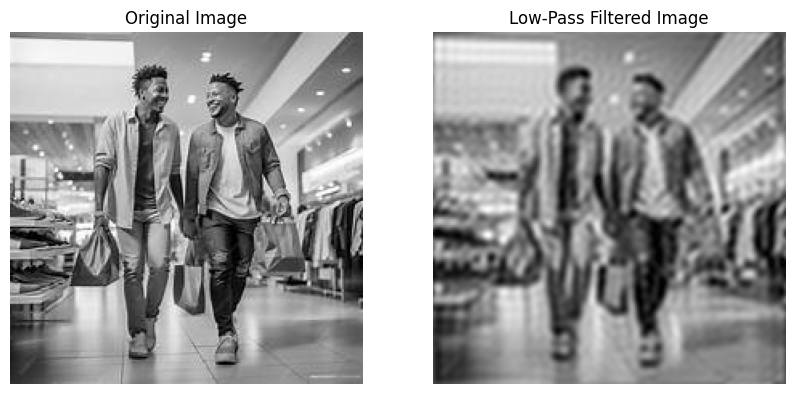

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_lpf, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.show()